# Linear Regression - Used Car Price Prediction

Second hand's car have a huge market base.Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment. The main reason for this huge market is that when you buy a New Car and sale it just another day without any default on it, the price of car reduces by 30%.

There are also many frauds in the market who not only sale wrong but also they could mislead to wrong price.So, here I used this following dataset to Predict the price of any used car.

In [6]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
dataset = pd.read_csv('used-car-dataset.csv')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Unnamed: 0           6019 non-null int64
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [9]:
dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [10]:
dataset.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [11]:
dataset = dataset.iloc[:,1:]
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [12]:
dataset.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [13]:
dataset.shape

(6019, 13)

In [14]:
dataset['Kilometers_Driven'].value_counts()

60000    82
45000    70
65000    68
50000    61
70000    60
         ..
50446     1
54540     1
70920     1
75014     1
83969     1
Name: Kilometers_Driven, Length: 3093, dtype: int64

In [15]:
# Looking at the unique values of Categorical Features
print(dataset['Location'].unique())
print(dataset['Fuel_Type'].unique())
print(dataset['Transmission'].unique())
print(dataset['Owner_Type'].unique())

#Rest Feature are worked for Feature Engineering

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [16]:
dataset.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

Let's Drop some Rows which contains NULL values.

I ignored New_Price as there are many cell which contains NULL value in this column.

In [17]:
print("Shape of train data Before dropping any Row: ",dataset.shape)
dataset = dataset[dataset['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",dataset.shape)
dataset = dataset[dataset['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",dataset.shape)
dataset = dataset[dataset['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power  : ",dataset.shape)
dataset = dataset[dataset['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats  : ",dataset.shape)

Shape of train data Before dropping any Row:  (6019, 13)
Shape of train data After dropping Rows with NULL values in Mileage:  (6017, 13)
Shape of train data After dropping Rows with NULL values in Engine :  (5981, 13)
Shape of train data After dropping Rows with NULL values in Power  :  (5981, 13)
Shape of train data After dropping Rows with NULL values in Seats  :  (5975, 13)


So, in total I have 5975 Rows now to work forward. I droped 44 rows.

Well after using *.notna()* we have many absent indexes (Eg: If row no 47 was droped then after 46 we have 48 index), so I reset the index and droping the present index.

In [18]:
dataset = dataset.reset_index(drop=True)

# Feautre Engineering 🛠
There are many different data which could be extarcted from present. And, that's where Feature Engineering comes.

In [19]:
for i in range(dataset.shape[0]):
    dataset.at[i, 'Company'] = dataset['Name'][i].split()[0]
    dataset.at[i, 'Mileage(km/kg)'] = dataset['Mileage'][i].split()[0]
    dataset.at[i, 'Engine(CC)'] = dataset['Engine'][i].split()[0]
    dataset.at[i, 'Power(bhp)'] = dataset['Power'][i].split()[0]

In [20]:
dataset['Mileage(km/kg)'] = dataset['Mileage(km/kg)'].astype(float)
dataset['Engine(CC)'] = dataset['Engine(CC)'].astype(float)

At this point when I tried to change **Power(bhp)** to float an error occured (Can't convert str to float : null).
So, I started investigating. And found some cell where having values: 'null bhp'

In [21]:
dataset['Power'][76]

'null bhp'

Then I found the indexes of these values and removed them.

In [22]:
x = 'n'
count = 0
position = []
for i in range(dataset.shape[0]):
    if dataset['Power(bhp)'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)
print(x)
print(count)
print(position)

Y
103
[76, 79, 89, 120, 143, 225, 242, 259, 304, 305, 383, 421, 425, 440, 469, 572, 628, 644, 645, 735, 744, 824, 910, 921, 929, 1063, 1138, 1148, 1266, 1313, 1338, 1380, 1411, 1546, 1569, 1640, 1663, 1848, 1989, 2043, 2118, 2152, 2250, 2254, 2292, 2328, 2377, 2425, 2434, 2481, 2485, 2511, 2561, 2579, 2616, 2621, 2868, 3010, 3038, 3081, 3166, 3224, 3266, 3414, 3491, 3506, 3562, 3601, 3611, 3618, 3642, 3706, 3868, 3900, 3969, 4046, 4049, 4318, 4321, 4593, 4672, 4676, 4706, 4792, 4848, 4862, 4914, 5024, 5078, 5186, 5383, 5395, 5415, 5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941]


In [23]:
dataset = dataset.drop(dataset.index[position])
dataset = dataset.reset_index(drop=True)

Now the new shape of training data is:

In [24]:
dataset.shape

(5872, 17)

In [25]:
dataset['Power(bhp)'] = dataset['Power(bhp)'].astype(float)

In [26]:
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.80


In [27]:
for i in range(dataset.shape[0]):
    if pd.isnull(dataset.loc[i,'New_Price']) == False:
        dataset.at[i,'New_car_Price'] = dataset['New_Price'][i].split()[0]

In [28]:
dataset['New_car_Price'] = dataset['New_car_Price'].astype(float)

Now,

Let's delete all useless featiures.

In [29]:
dataset.drop(["Name"],axis=1,inplace=True)
dataset.drop(["Mileage"],axis=1,inplace=True)
dataset.drop(["Engine"],axis=1,inplace=True)
dataset.drop(["Power"],axis=1,inplace=True)
dataset.drop(["New_Price"],axis=1,inplace=True)

In [30]:
dataset.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


# Data Visualization
### Let's Plot some
Data visualization is the best way to find out how a data looks like

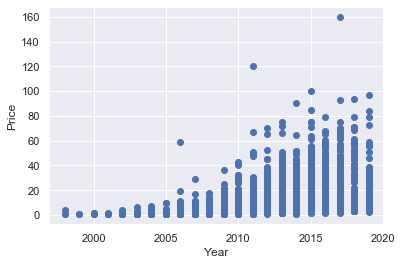

In [31]:
plt.scatter(dataset[['Year']],dataset[['Price']])
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [32]:
import lux

In [33]:
lux.logger=True

In [34]:
dataset

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Delhi,2014,27365,Diesel,Manual,First,5.0,4.75,Maruti,28.40,1248.0,74.00,7.88
5868,Jaipur,2015,100000,Diesel,Manual,First,5.0,4.00,Hyundai,24.40,1120.0,71.00,NaN
5869,Jaipur,2012,55000,Diesel,Manual,Second,8.0,2.90,Mahindra,14.00,2498.0,112.00,NaN
5870,Kolkata,2013,46000,Petrol,Manual,First,5.0,2.65,Maruti,18.90,998.0,67.10,NaN


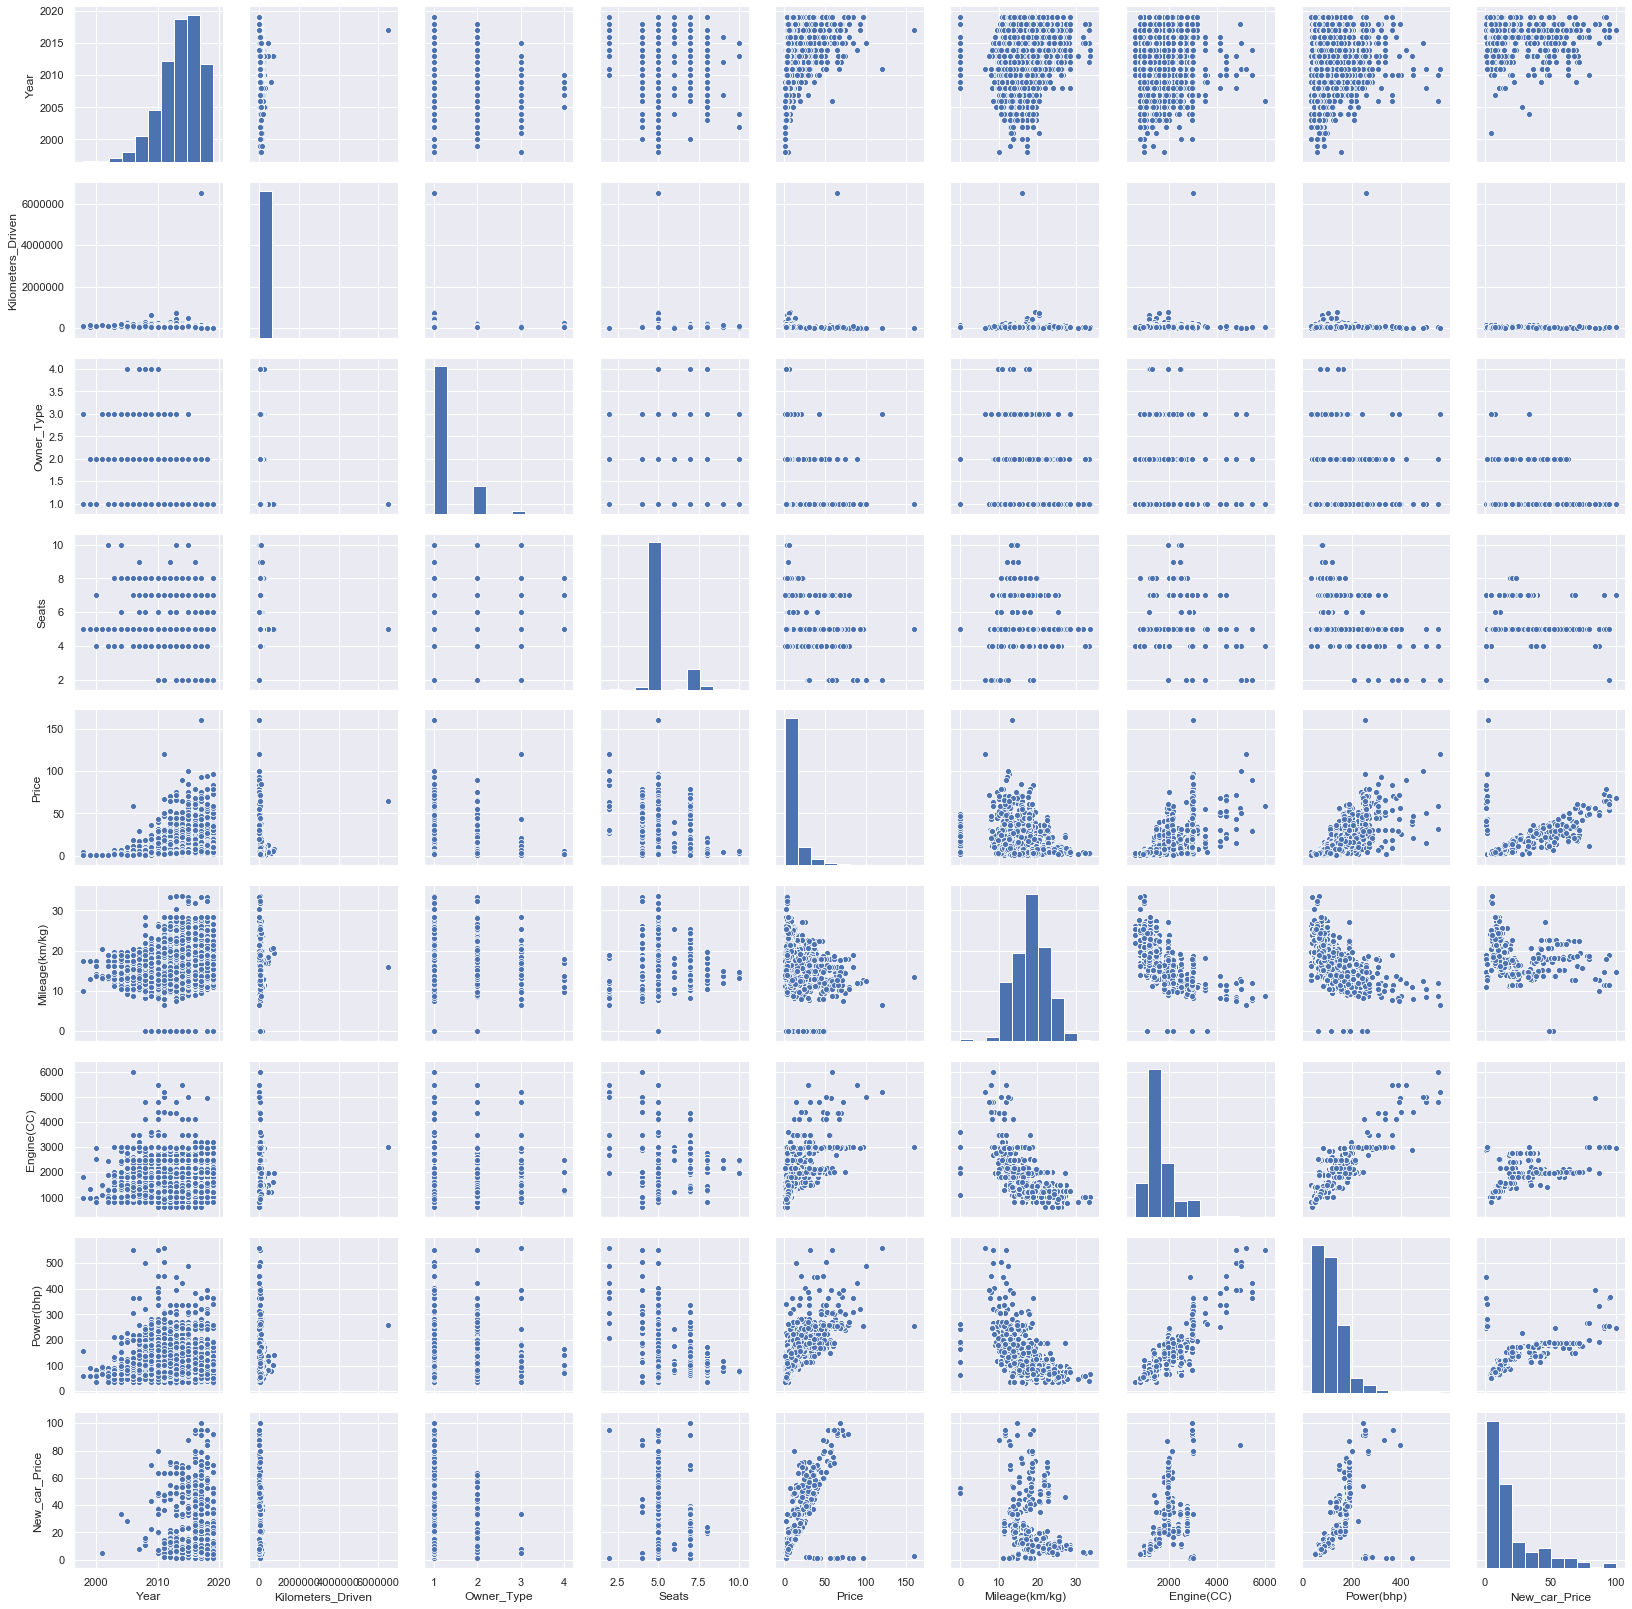

In [74]:
sns.pairplot(dataset)

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 13 columns):
Location             5872 non-null object
Year                 5872 non-null int64
Kilometers_Driven    5872 non-null int64
Fuel_Type            5872 non-null object
Transmission         5872 non-null object
Owner_Type           5872 non-null object
Seats                5872 non-null float64
Price                5872 non-null float64
Company              5872 non-null object
Mileage(km/kg)       5872 non-null float64
Engine(CC)           5872 non-null float64
Power(bhp)           5872 non-null float64
New_car_Price        823 non-null float64
dtypes: float64(6), int64(2), object(5)
memory usage: 596.5+ KB


In [35]:
dataset['Price'].describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

### Price

First let's have a look over our target column

(0, 160)

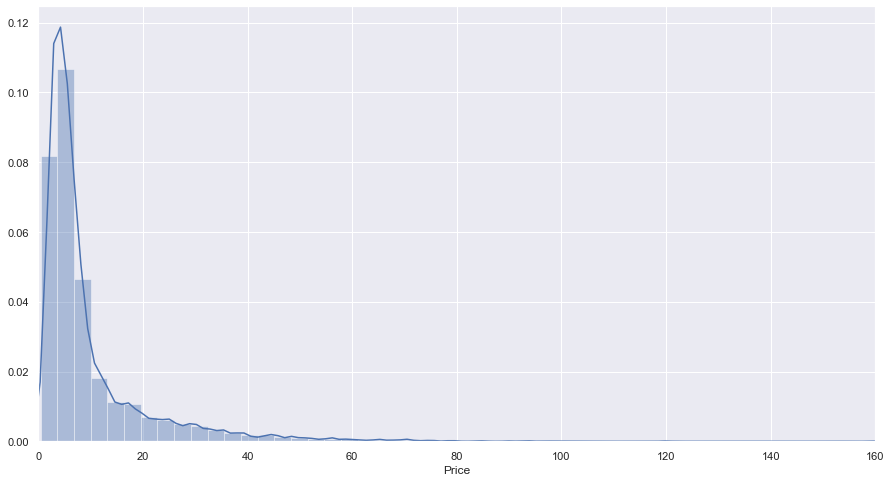

In [36]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(dataset['Price'])
plt.xlim([0,160])

### Fuel Type

In [37]:
dataset['Fuel_Type'].describe()

count       5872
unique         4
top       Diesel
freq        3152
Name: Fuel_Type, dtype: object

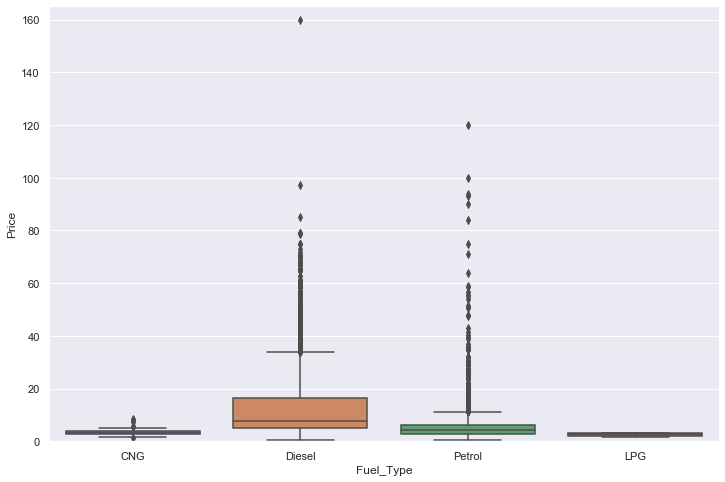

In [38]:
var = 'Fuel_Type'
data = pd.concat([dataset['Price'], dataset[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);

As, we thought diseal car would cost followed Petrol.

### Year

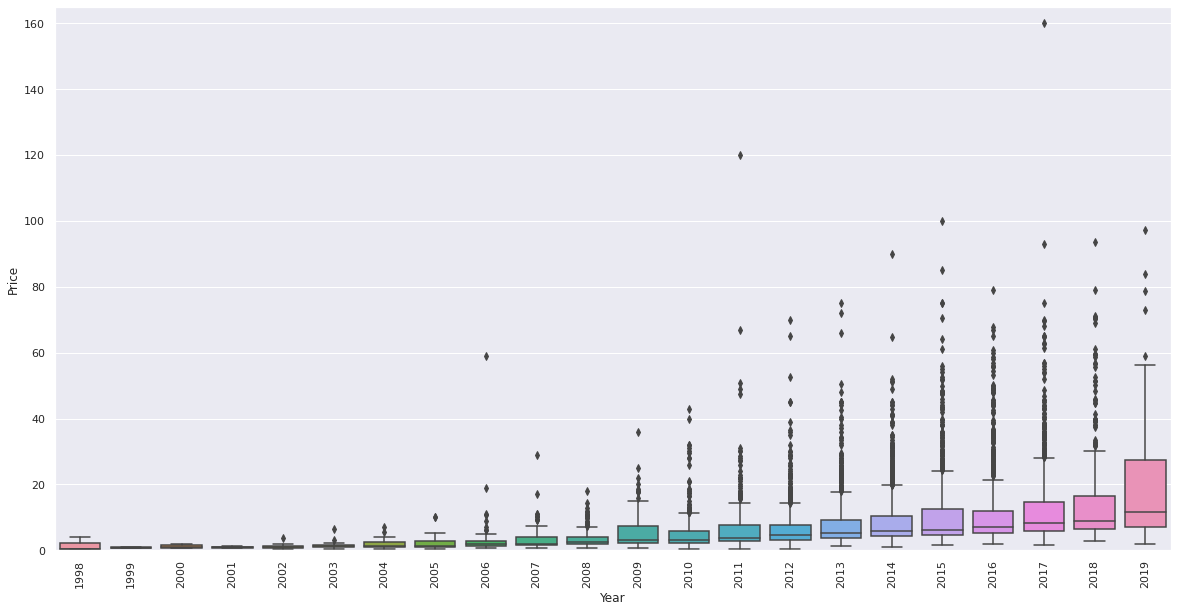

In [31]:
var = 'Year'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

Clearly, it's a strong tendency.

Price of Newest is high compared to old models.

### Owner Type

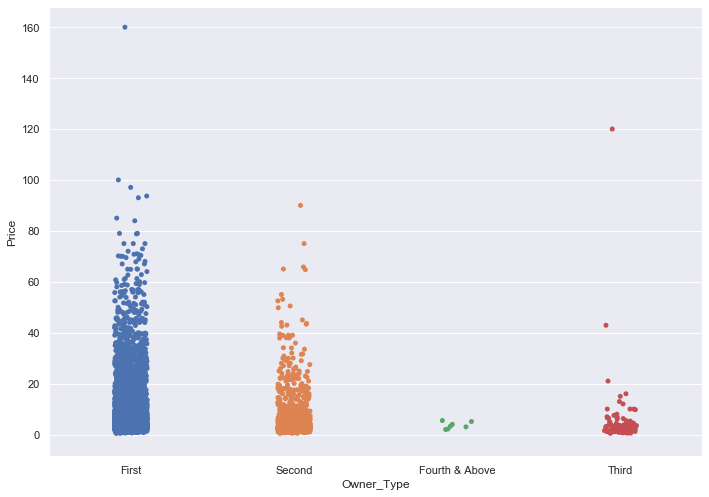

In [41]:
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = dataset) 

### Company

<Figure size 1440x720 with 0 Axes>

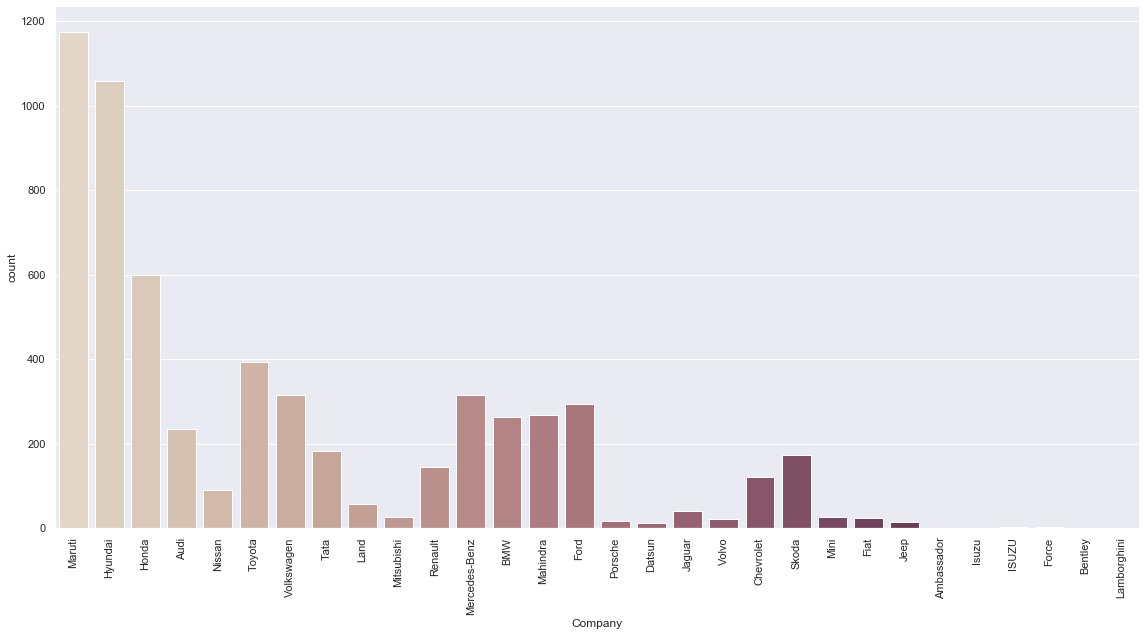

In [42]:
var = "Company"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=dataset);
plt.xticks(rotation=90);

Cleary **Maruti** is most comman brand followed by **Hyundai**

# Working with Categorical Data

As for now we have left with only 5 categorical features:
1. Location
2. Fuel_Type
3. Transmission
4. Owner_Type
5. Company

For hadeling categorical data. We modtly use these 2 path:
1. OneHotEncoder
2. LabelEncoder

Where OneHotEncoder is used where data are not in any order and LabelEncoder when data is in order.

So, for each Features we will use plots to find out what to be used there.

### Working for Location

In [43]:
var = 'Location'
dataset[var].value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

From above values, we could judge that Mubmai has most number of cars to be sold followed by others.

<function matplotlib.pyplot.show(*args, **kw)>

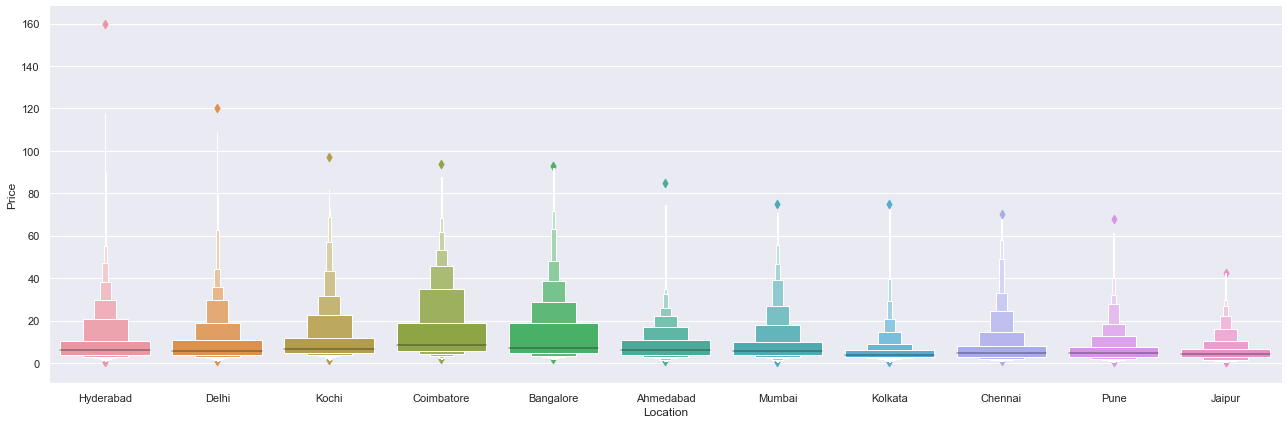

In [44]:
# Plot Location vs Price
sns.catplot(y='Price',x=var,data= dataset.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

We will be using One-hot-encoding here

In [45]:
Location = dataset[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


### Working for Fuel_Type

In [46]:
var = 'Fuel_Type'
dataset[var].value_counts()

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

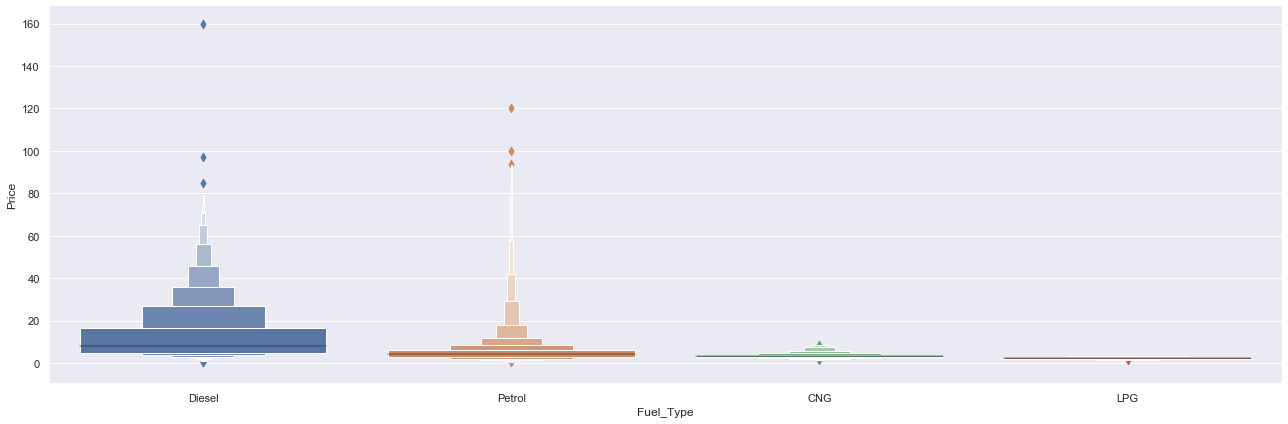

In [47]:
# Plot Fuel_Type vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x=var,data= dataset.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Again we will be using One-hot-encoding

In [48]:
Fuel_t = dataset[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


### Working with Transmission

In [49]:
var = 'Transmission'
dataset[var].value_counts()

Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

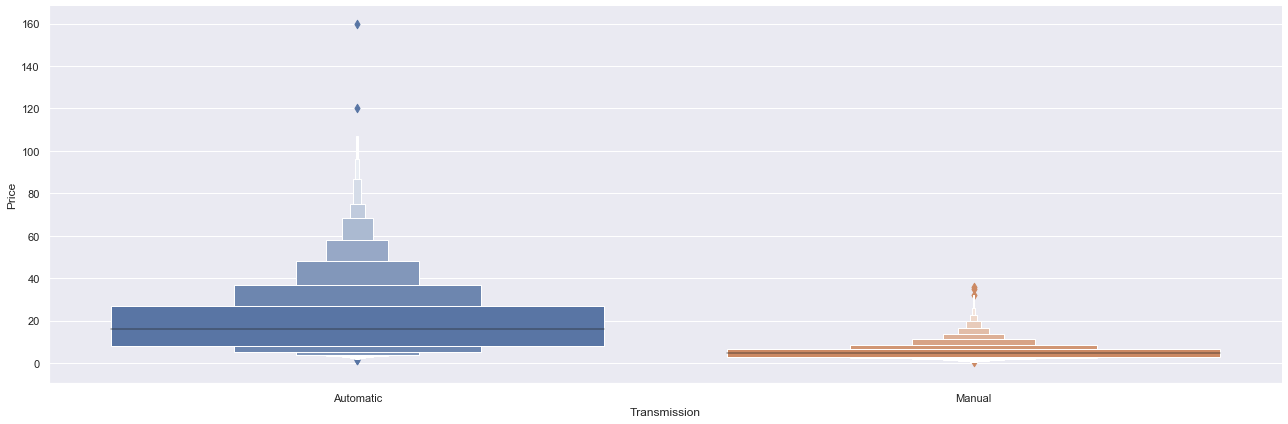

In [50]:
# Plot Transmission vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x=var,data= dataset.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

No, order so One-hot-encoding

In [51]:
Transmission = dataset[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


### Working with Owner_Type

In [52]:
var = 'Owner_Type'
dataset[var].value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

As Owner_Type column has ordered data so we will be using **Label Encoding** 
**Finally**

In [53]:
dataset.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
dataset.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


### Working with Company

In [54]:
var = 'Company'
dataset[var].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Lamborghini         1
Bentley             1
Isuzu               1
Ambassador          1
Name: Company, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

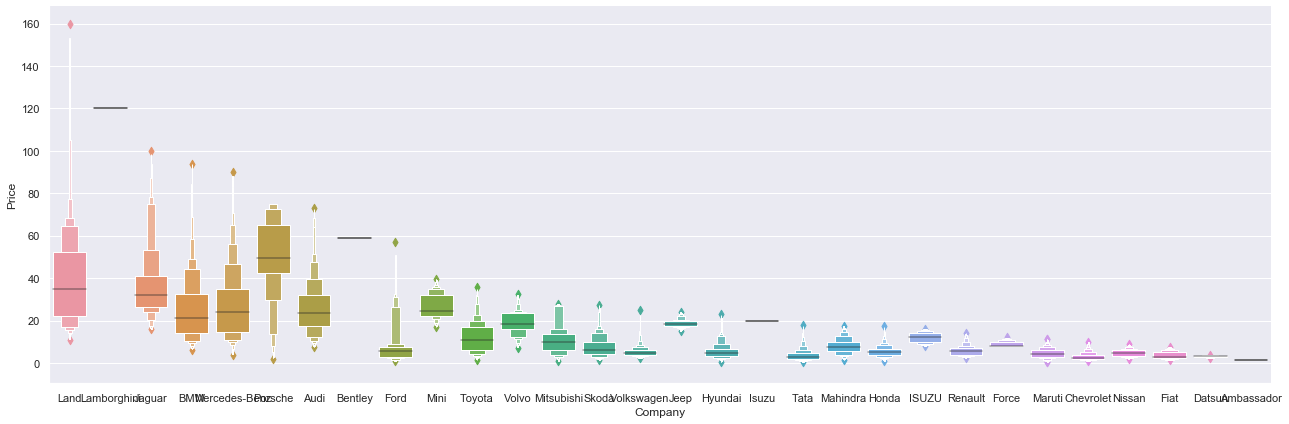

In [55]:
# Plot Company vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x=var,data= dataset.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

A lot of variation so let's drop them

In [47]:
dataset.drop(["Company"],axis=1,inplace=True)

In [56]:
final_dataset= pd.concat([dataset,Location,Fuel_t,Transmission],axis=1)
final_dataset.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,...,0,0,0,0,1,0,0,0,0,1
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,...,0,0,0,0,0,1,1,0,0,1
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,...,0,0,0,0,0,0,0,0,1,1
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,...,0,0,0,0,0,0,1,0,0,1
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,...,0,0,0,0,0,0,1,0,0,0


In [57]:
final_dataset.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_dataset.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,1.75,Maruti,26.60,998.0,58.16,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,5.0,12.50,Hyundai,19.67,1582.0,126.20,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,5.0,4.50,Honda,18.20,1199.0,88.70,0,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,6.00,Maruti,20.77,1248.0,88.76,0,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,5.0,17.74,Audi,15.20,1968.0,140.80,0,...,0,0,0,0,0,0,1,0,0,0


In [58]:
final_dataset.shape

(5872, 23)

We are Done with Training data, so now work on Test Data

# Final Features Selection

As our train and test data are ready so now we have to only look for features on which we have to work.

In [59]:
final_dataset.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price', 'Company',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual'],
      dtype='object')

In [60]:
X = final_dataset.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual']]
X.shape

(5872, 21)

In [62]:
y = final_dataset.loc[:,['Price']]
y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


In [63]:
plt.figure(figsize=(18,18))
sns.heatmap(d.corr(),annot=True,cmap='RdYlGn')

plt.show()

NameError: name 'd' is not defined

<Figure size 1296x1296 with 0 Axes>

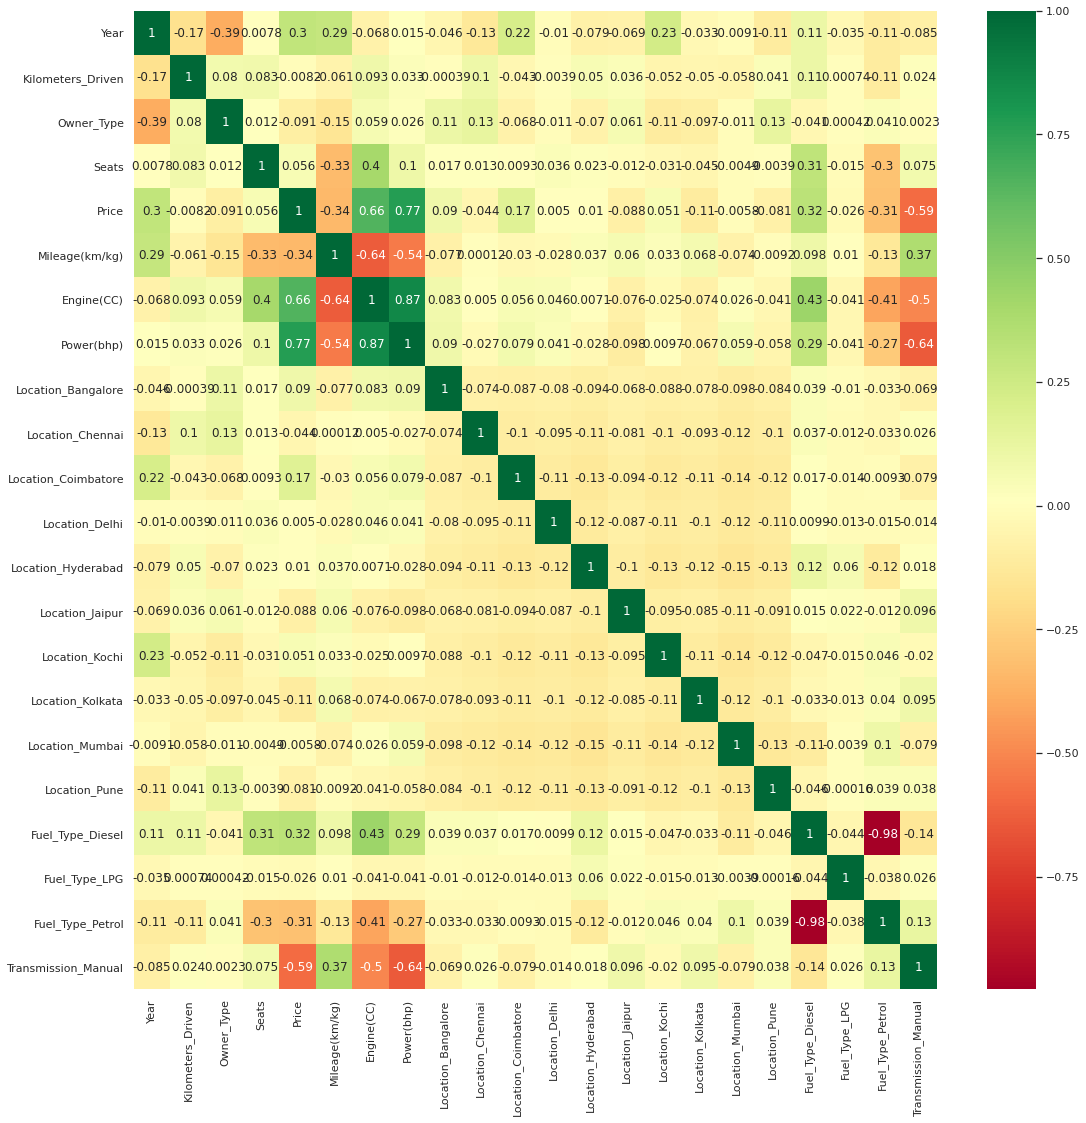

In [58]:
plt.figure(figsize=(18,18))
sns.heatmap(final_train.corr(),annot=True,cmap='RdYlGn')

plt.show()

# Build it (Model)

First we are spliting the data to train and test for the model

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

### First let me try Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traning set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traning set:  0.7083070284244629
Accuracy on Testing set:  0.6991016530826978


In [70]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  3.6843068533998564
Mean Squared  Error      :  35.262403548563476
Root Mean Squared  Error :  5.938215518871261
R Squared Error          :  0.6991016530826978
